# A Beginner Friendly Introduction to Descriptive Statistics 😎

## Introduction:

Descriptive statistics summarize and organize characteristics of a data set. A data set is a collection of responses or observations from a sample or entire population.

In quantitative research, after collecting data, the first step of statistical analysis is to describe characteristics of the responses, such as the average of one variable (e.g., age), or the relation between two variables (e.g., age and creativity).

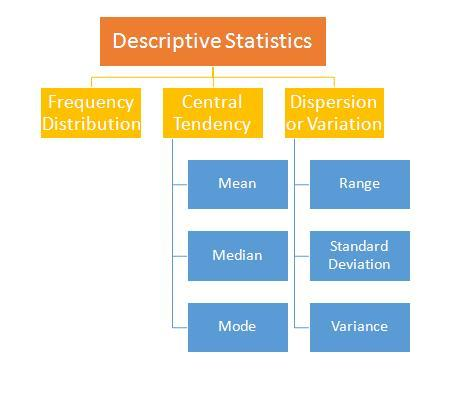

Let us walk through each of the measures using a simple dataset to understand the measures of central tendency like Mean, Median, Mode and measures of variability such as range, standard deviation and variance. We will also see some more advanced concepts using normal distribution and box plots to understand the normality of the data set.

In this notebook, we will calculate the measures of the data with both standard programming approach and more with robust approach using libraries like numpy, pandas, matplotlib and seaborn etc. These libraries are built-in tools to provide better understanding of the data and visualise the output.

__Let us import the libraries required for this notebook.__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

_Now that we have imported the required libraries and modules with aliases as np, pd, plt etc.., we can use them with these shortened names throughout this notebook_

In [3]:
#Reading the dataset to the pandas dataframe
df = pd.read_csv("data.csv")
#To read the top 5 elements in the dataset, we can use,
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


__Rows__: These are individual responses or can be called a data point. <br>
__Columns__: Here we can see that each column is representing an attribute or parameter.

In [4]:
#The following command is used to understand certain parameters of the data like count, mean, median etc..
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


The command __df.describe()__ may feel a little overwhelming at the moment, we will unveil most of them in this notebook.

## Measures of central tendency:
Measures of central tendency are numbers that describe what is average or typical within a distribution of data. There are three main measures of central tendency: mean, median, and mode. While they are all measures of central tendency, each is calculated differently and measures something different from the others.

### 1. Mean: 
The mean is the most common measure of central tendency also called as average. Anyone can use the mean to describe the data distribution of variables measured as intervals or ratios. These are variables that include numerically corresponding categories or ranges like income, heights, population etc..

It is very simple to calculate mean. One simply has to add all the data values and then divide this sum by the total number of scores in the distribution of data. 
The symbol for denoting mean is $/mu$. <br>
$$\mu = \frac{sum\ of\ values} {Total\ number\ of\ values}$$

Let us now calculate the mean of the column called, __Annual_HH_Income__

In [5]:
# Method 1
# defining a function called m1 that calculates mean
def m1(x):
    a = sum(x)
    b = len(x)
    return a/b
# calling the function m1 on our column Annual_HH_Income
a = m1(df['Annual_HH_Income'])
print("The mean of the annual income is {}".format(a))

The mean of the annual income is 490019.04


In [6]:
# Method 2
# The mean can easily calculated using built-in function as follow:
b = df['Annual_HH_Income'].mean()
print("The mean of the annual income is {}".format(b))

The mean of the annual income is 490019.04


You can clearly observe that the we have calculated the mean using two methods and got the output to be exacly same.

### 2. Median:
The median is the value at the middle of a distribution of data when those data are organized from the lowest to the highest value.<br>

Let’s suppose we have the following list of numbers: 5, 7, 10, 43, 2, 69, 31, 6, 22. Initially, we must arrange the numbers in order from lowest to highest i.e sorting them in ascending order. The result is this: 2, 5, 6, 7, 10, 22, 31, 43, 69. The __median is 10__ because it is the exact middle number. There are 4 numbers on each side of the value 10.

If your data distribution has an even number of cases which means that there are no single middle value, one can simply adjust the data range slightly in order to calculate the median. <br>

For example, if we add the number 87 to the end of our list of numbers above, we have 10 total numbers in our distribution, so there is no single middle number. In this case, one takes the average of the scores for the two middle numbers. In our new list, the two middle numbers are 10 and 22. So, we take the average of those two numbers: (10 + 22) /2 = 16. Our __median is now 16.__

Let us calculate the median value of the same paramerer __Annual_HH_Income__ of the given dataset

In [7]:
# Method 1
def m2(x):
    a = len(x)
    index = a // 2
    if a % 2:
        return sorted(x)[index]
    return sum(sorted(x)[index - 1:index + 1]) / 2
a = m2(df['Annual_HH_Income'])
print("The annual median income value is {}".format(a))

The annual median income value is 447420.0


In [8]:
# Method 2
b = df["Annual_HH_Income"].median()
print("The annual median income value is {}".format(b))

The annual median income value is 447420.0


We can observe that in either of the above two approaches, we got the same results.

### 3. Mode:
The mode is the measure of central tendency that identifies the category or value that occurs the most frequently within the distribution of data. In other words, it is the most common score that appears the highest number of times in a distribution.
<br>

For example, let’s say we are looking at number of persons present in each family among 100 families and the distribution looks like this:
<br>

>4 persons: 60 <br>
3 persons: 35 <br>
2 persons: 17 <br>
5 persons: 13 <br>
6 persons: 3 <br>

So for the above distribution, the 4 persons families are higher in frequency with 60. <br> The mode of the above distribution is __4_persons__ <br>

IF your distribution has 2 high frequencies of the same value then we should consider both the values and such a distribution is called __Bimodal distribution__ <br>
Similarly, if any distribution has more than 2 modes then it is called __multimodal distribution__.

The formula for calculating mode is given as <br>
$$
z = L + \frac{(fm - f1)h} {(fm-f1)(fm-f2)}
$$

>Where, <br>
>L = Lower limit Mode of modal class <br>
fm = Frequency of modal class<br>
f1 = Frequency of class preceding the modal class <br>
f2= Frequency of class succeeding the modal class <br>
h = Size of class interval <br>

Let us now calculate the mode of the column __No_of_Fly_Members.__

In [9]:
#Method 1 by creating a function called m3
from collections import Counter
def m3(x):
    a = Counter(x)
    return [b for b, c in a.items() if c == a.most_common(1)[0][1]]
a = m3(df['No_of_Fly_Members'])
print("The mode of no. of family members is {}".format(a))

The mode of no. of family members is [4]


In [10]:
# Mrthod 2 is simply by using an built-in function
b = df['No_of_Fly_Members'].mode()
print("The mode of no. of family members is {}".format(b))

The mode of no. of family members is 0    4
dtype: int64


_With this we have completed the measures of central tendency_

## Measure of Variability:
The measure of variability is the statistical summary, which represents the dispersion within the datasets. On the other hand, the measure of central tendency defines the standard value. <br>

Statisticians use measures of variability to check how far the data points are going to fall from the given central value. We can calculate __Range, Variance and Standard deviation__ in order to measure the variability in the data. 

### 1. Range: 
The range gives you an idea of how far apart the most extreme response scores are. To calculate the range we shall subtract the minimum value from the data from the maximum value. <br>
> For example, Let the data be 5, 17, 24, 2, 199, 100 <br>
The maximum value is max = 199 <br>
The minimum value is min = 2 <br>
Now, the range is r = max - min i.e 199 -2 <br>
                        r = 197

Let us find the variability of the column __Mthly_HH_Expense__ 

In [11]:
# Method 1
def range(x):
    return max(x) - min(x)
a = range(df["Mthly_HH_Expense"])
print("The range of the monthly Household expenses column is given by {}". format(a))

The range of the monthly Household expenses column is given by 48000


In [12]:
# Method 2
b = df['Mthly_HH_Expense'].max() - df['Mthly_HH_Expense'].min()
print("The range of the monthly Household expenses column is given by {}". format(b))

The range of the monthly Household expenses column is given by 48000


### 2. Varaince ($\sigma^2$)
The variance is the average of squared deviations from the mean. Variance reflects the degree of spread in the data set. The more spread the data, the larger the variance is in relation to the mean.<br>

To find the variance, we can square the standard deviation. The symbol for variance is $\sigma^2$. <br>
__Note:__: We will learn more about standard deviation in the next section.

>To find the varaince,

>1. find their mean of the data.<br>
2. Subtract the mean from each value to get the deviation from the mean.<br>
3. Square each of these deviations.<br>
4. Sum up all of the squared deviations.<br>
5. Divide the sum of the squared deviations by N – 1. It is N-1 because we do not consider the mean point.  <br>

The formula for finding the variance is simply, given as
$$
\sigma^2 = \frac{\sum_i^n(x_i-\bar{X})^2}{n-1}
$$

> $\bar{X}$ = Mean <br>
n = count or total number of values<br>
$\sigma^2$ = variance <br>

Let us now find the variance of the column __Emi_or_Rent_Amt__

In [13]:
# Method 1
def variance(data):
    mean = sum(data) / len(data)
    var = sum((a - mean) ** 2 for a in data) / len(data)
    return var
a = variance(df['Emi_or_Rent_Amt'])
print("The variance in the Emi or Rent amount paid by the families is {}". format(a))

The variance in the Emi or Rent amount paid by the families is 38176400.0


In [14]:
# Method 2 by using var method in numpy library
b = np.var(df['Emi_or_Rent_Amt'])
print("The variance in the Emi or Rent amount paid by the families is {}". format(b))

The variance in the Emi or Rent amount paid by the families is 38176400.0


### 3. Standard deviation ($\sigma$):
The standard deviation ($\sigma$) is the average amount of variability in the dataset. It tells us, on an average, how far each value lies from the mean. The larger the standard deviation, the more variability in the the data set.

>To find the standard deviation,

>1. find their mean of the data.<br>
2. Subtract the mean from each value to get the deviation from the mean.<br>
3. Square each of these deviations.<br>
4. Sum up all of the squared deviations.<br>
5. Divide the sum of the squared deviations by N – 1. It is N-1 because we do not consider the mean point.  <br>
6. Find the square root of the number you found.<br>

The formula for calculating the standard deviation is given as, <br>
$$
\sigma = \sqrt\frac{\sum_i^n(x_i-\bar{X})^2}{n-1}
$$

> $\bar{X}$ = Mean <br>
n = count or total number of values<br>
$\sigma$ = stadard deviation<br>

Now, let's calculate the standard deviation of the column __Mthly_HH_Expense__ to understand the deviation that the distribution has in monthly household expenses.

In [15]:
# Method 1 by defining a function to calculate the the std
def stdev(data):
    var = variance(data)
    std = math.sqrt(var)
    return std
a = stdev(df['Mthly_HH_Expense'])
print("The standard deviation in the monthly household expenses of given set of families is {}".format(a))

The standard deviation in the monthly household expenses of given set of families is 11968.704023410388


In [16]:
# Method 2 is by using std method or function present in the numpy library 
b = np.std(df['Mthly_HH_Expense'])
print("The standard deviation in the monthly household expenses of given set of families is {}".format(b))

The standard deviation in the monthly household expenses of given set of families is 11968.704023410388


### 4. Correlation ($r_{xy}$):
Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables.<br>

For example, in the stock market, if we want to measure how two stocks are related to each other, Pearson r correlation is used to measure the degree of relationship between the two. <br>

The formula to calculate the correlation coefficient r is given as

$$
r_{xy} = \frac{\sum_i^n(x_i-\bar{X})(y_i-\bar{Y})}{\sqrt\sum_i^n(x_i-\bar{X})^2\sqrt(y_i-\bar{Y})^2}
$$

>$r_{xy}$ = Pearson r correlation coefficient between x and y <br>
n = number of observations <br>
$x_i$ = value of x (for $i^{th}$ observation)<br>
$y_i$ = value of y (for $i^{th}$ observation)<br>

Now, we shall find the correlation between __Mthly_HH_Income and Mthly_HH_Expense__ to understand the correlation between Income and Expenses. 

In [17]:
# Method 1
def pearson(x, y):
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_seq = sum(xi*xi for xi in x)
    sum_y_seq = sum(yi*yi for yi in y)
    psum = sum(xi*yi for xi, yi in zip(x, y))
    num = psum - (sum_x * sum_y/n)
    den = pow((sum_x_seq - pow(sum_x, 2) / n) * (sum_y_seq - pow(sum_y, 2) / n), 0.5)
    if den == 0: return 0
    return num / den

a = round(pearson(df['Mthly_HH_Income'],df['Mthly_HH_Expense']),2)
print("The correlation between Income and Expenses of the families given is {}".format(a))

The correlation between Income and Expenses of the families given is 0.65


In [18]:
# Method 2
b = round(df['Mthly_HH_Income'].corr(df['Mthly_HH_Expense']), 2)
print("The correlation between Income and Expenses of the families given is {}".format(b))

The correlation between Income and Expenses of the families given is 0.65


This briefly sums up the measures of variability concepts in the descriptive statistics. <br>We are now moving into something very interesting which is distributions. From now on, we will be using other libraries like seaborn, matplotlib to visualise the output.

### Normal Distribution:
A distribution in which the data is symmetrically distributed with no skew is called __Normal distribution__. <br>
When plotted on a graph, the data follows a bell shape, with most values clustering around a central region and tapering off as they go further away from the center. 

Normal distributions are also called Gaussian distributions or bell curves because of their shape.<br>

> The formula for calculating the normal distribution function is given as,<br>
$$
f(x,\mu,\sigma) = \frac{1}{\sigma\sqrt2\pi}e^\frac{-(x-\mu)^2}{2\sigma^2}
$$

> where, <br>
x = values of array x<br>
>$\mu$ = mean of the distribution <br>
>$\sigma^2$ = variance of the distribution <br>
$\sigma$ = standard deviation of the distribution

Let us use the library numpy to generate some random values and plot the distribution using the seaborn to visualise the normal distribution.

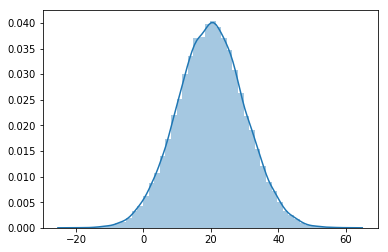

In [20]:
norm = np.random.normal(loc = 20, scale = 10, size = 50000)
sns.distplot(norm, kde = True)


Above is the normally distributed random data of 50000 data points with mean($\mu$) at 20 and standard deviation ($\sigma$) = 10

### Features of Normal distrubution

There are certain characteristics that makes normal distribution more popular and widely used. Let us see them in detail,<br>
> 1.The mean, median and mode values for a normal distribution are all equal.<br>

> 2.Approximately 68% of values in the distribution are within 1 Standard deviation of the mean, i.e., above or below.<br>
P ($\mu - \sigma < X < \mu + \sigma$) = 0.68

>3.Approximately 95% of values in the distribution are within 2 Standard deviations of the mean.
P ($\mu - 2\sigma < X < \mu + 2\sigma$) = 0.95

>4.Approximately 99% of values in the distribution are within 3 Standard deviations of the mean.
P ($\mu - 3\sigma < X < \mu + 3\sigma$) = 0.99

>5.Total area under the curve is equal to 1

>6.The curve is symmetric about the mean.


Let us now visualise the above stated properties. Calculating the mean and standard deviation of the above plot are

In [21]:
mean_norm = norm.mean()
std_norm = norm.std()
print(mean_norm, std_norm)

20.00340253970552 9.976320763205923


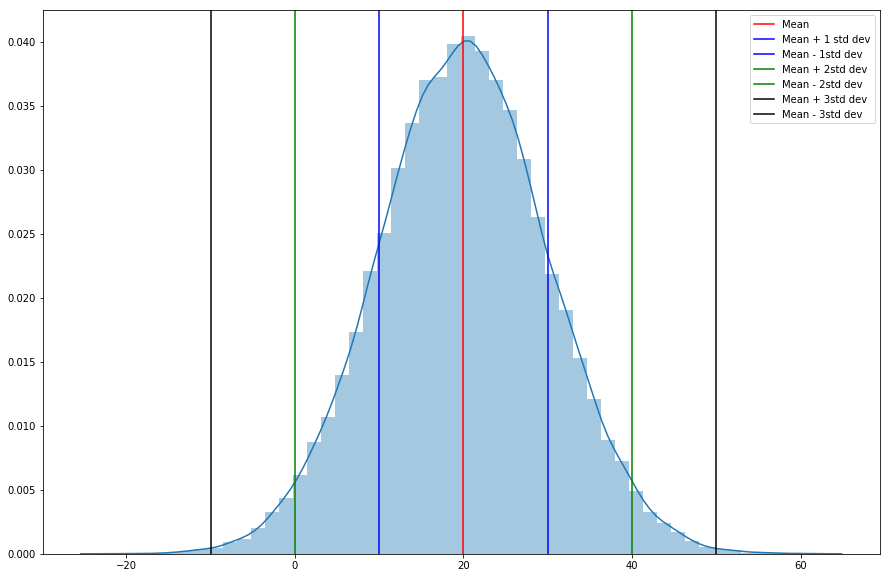

In [22]:
one_stdev_left = mean_norm - (1 * std_norm)
one_stdev_right = mean_norm + (1*std_norm)
two_stdev_left = mean_norm - (2*std_norm)
two_stdev_right = mean_norm + (2*std_norm)
three_stdev_left = mean_norm - (3*std_norm)
three_stdev_right = mean_norm + (3*std_norm)
plt.figure(figsize=(15, 10))

sns.distplot(norm)

plt.axvline(mean_norm, color='red', label='Mean')

plt.axvline(one_stdev_right, color='blue', label='Mean + 1 std dev')
plt.axvline(one_stdev_left, color='blue', label='Mean - 1std dev')
plt.axvline(two_stdev_right, color='green', label='Mean + 2std dev')
plt.axvline(two_stdev_left, color='green', label='Mean - 2std dev')
plt.axvline(three_stdev_right, color='black', label='Mean + 3std dev')
plt.axvline(three_stdev_left, color='black', label='Mean - 3std dev')
plt.legend()


>From the above visualisation we can observe that,<br>
The distribution is symmetric,<br>
The coloured lines depicts the distribution with respect to number of standard deviations.

We shall see one example for the normal distribution from our data.csv file with a column data

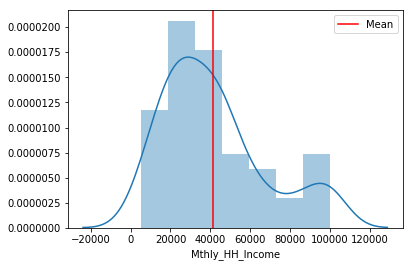

In [23]:
sns.distplot(df['Mthly_HH_Income'], kde = True)
plt.axvline(df["Mthly_HH_Income"].mean(), color='red', label='Mean')
plt.legend()

### Positively Skewed Normal distribution:
Positively Skewed Distribution is a type of distribution where the mean, median and mode of the distribution are positive rather than negative or zero i.e., data distribution occurs more on the one side i.e left side of the scale with long tail on the right side.<br>
>Let us see one such distribution from our data set by exploring Annual_HH_Income column

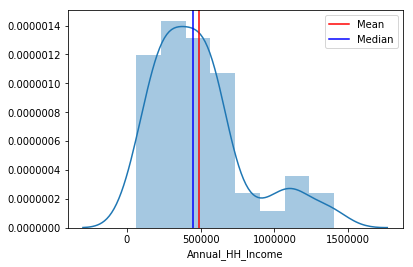

In [24]:
sns.distplot(df['Annual_HH_Income'], kde = True)
plt.axvline(df["Annual_HH_Income"].mean(), color='red', label='Mean')
plt.axvline(df["Annual_HH_Income"].median(), color='blue', label='Median')
plt.legend()


Let us see the mean and median values of the above plot

In [25]:
print("The mean is {} and median is {}".format(df["Annual_HH_Income"].mean(),df["Annual_HH_Income"].median()))


The mean is 490019.04 and median is 447420.0


So this clearly shows that the above distribution is positively skewed.<br>
We can convert the right skewed distribution into normal distribution by using box cox. Let us see that in action 

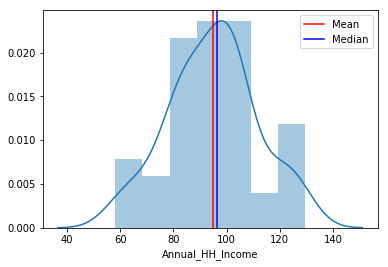

In [26]:
df['Annual_HH_Income'] = stats.boxcox(df['Annual_HH_Income'])[0]
sns.distplot(df['Annual_HH_Income'], kde = True)
plt.axvline(df["Annual_HH_Income"].mean(), color='red', label='Mean')
plt.axvline(df["Annual_HH_Income"].median(), color='blue', label='Median')
plt.legend()

We can also plot a qq plot for the above distribution,

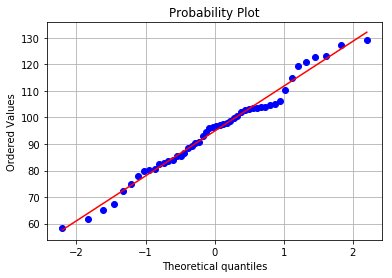

In [27]:
stats.probplot(df['Annual_HH_Income'], dist="norm", plot=plt)

plt.grid()

So we can see how the plot's skewness has been removed by boxcox method of stats library. We will do similar operations on a negatively skewed distribution before winding up this,


### Negatively Skewed distributon
Negatively Skewed Distribution is a type of distribution where the mean, median and mode of the distribution are negative rather than positive or zero i.e., data distribution occurs more on the one side i.e right side of the scale with long tail on the left side. <br>

> Fortunately, our dataset doesn't have any negatively skewed parameter. We shall see one raw example for the visualisation purpose

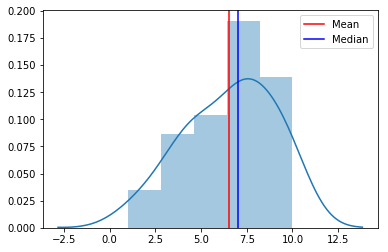

In [28]:
L = [1,2,3,3,4,4,4,5,5,5,5,5,6,7,7,7,7,7,7,7,8,8,8,8, 9,9,9,9,10,10,10,10]
sns.distplot(L, kde = True)
plt.axvline(m1(L), color='red', label='Mean')
plt.axvline(m2(L), color='blue', label='Median')
plt.legend()

So this clearly shows that the above distribution is negatively skewed.
We can convert the negatively skewed distribution into normal distribution by using box cox. Let us see that in action

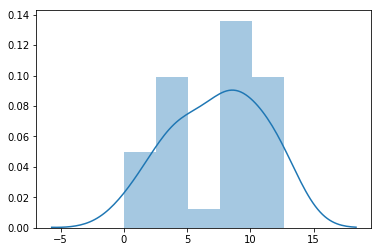

In [29]:
L = stats.boxcox(L)[0]
sns.distplot(L, kde = True)

Let us finally see the qq plot of this distribution. We can judge the skewness based on the qqplot as well.

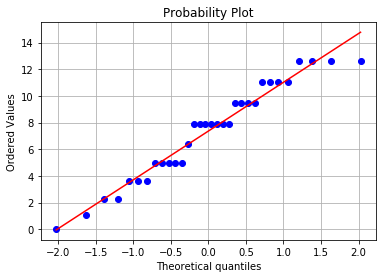

In [30]:
stats.probplot(L, dist="norm", plot=plt)

plt.grid()